In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

## first simulation growth without any abx as an integrity check

In [5]:
time_step = 0.1
param1 = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 1, # ribosome synthesis rate
         "beta": 1, # translation rate
         "gama": 0.1, # cell wall synthesis rate
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim1 = Cell(**param1)

In [6]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 20
t_eval = np.arange(0, length, time_step)
time_series = my_sim1.cell_growth(initial_conditions, length=20, methods="RK45", t_eval=t_eval)

100%|██████████| 1000/1000 [00:00<00:00, 249898.95‰/s]


In [7]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.980e+01  1.990e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 1.000e+00  1.105e+00 ...  1.100e+01  1.100e+01]
            ...
            [ 0.000e+00  1.046e-01 ...  1.000e+01  1.000e+01]
            [ 1.000e+00  1.001e+00 ...  3.577e+07  3.953e+07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 97
     njev: 0
      nlu: 0


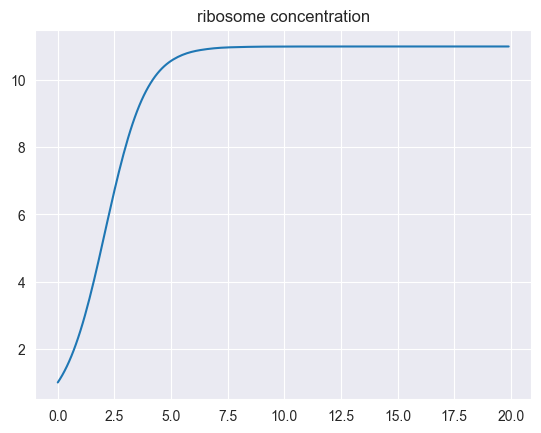

In [8]:
plt.plot(time_series.t, time_series.y[1])
plt.title("ribosome concentration")
plt.show()

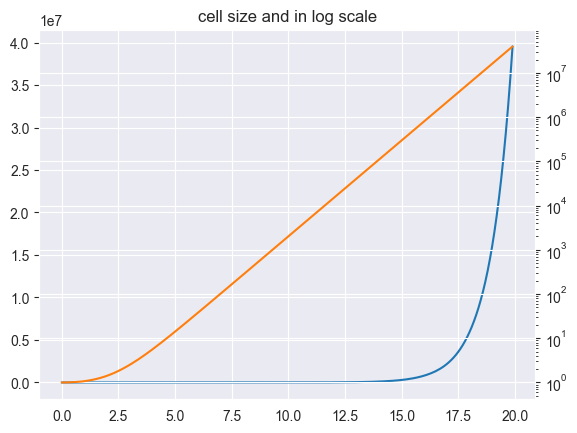

In [9]:
fig0, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size and in log scale")
plt.show()

## abx treatment - constant env

In [19]:
time_step = 0.1
admin_time = 100
recovery_time = 200
param2 = {"ribo_min": 0.5, 
          "p_in": 1, 
          "p_out": 1, 
          "k_on": 2, 
          "k_off": 0.1, 
          "alpha": 0.05, 
          "beta": 0.05, 
          "gama": 0.01, 
          "abx_env": 3, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)

In [20]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 400
t_eval = np.arange(0, length, time_step)
time_series = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|██████████| 1000/1000 [00:00<00:00, 10047.46‰/s]


In [21]:
# print(time_series)

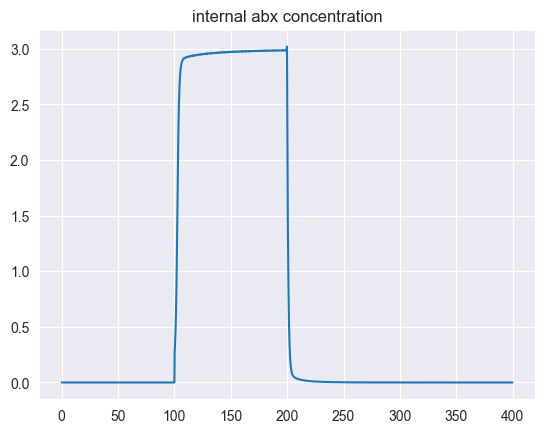

In [22]:
plt.plot(time_series.t, time_series.y[0])
plt.title("internal abx concentration")
plt.show()

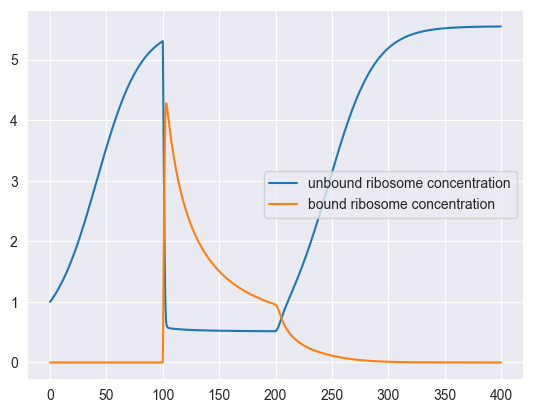

In [23]:
plt.plot(time_series.t, time_series.y[1], label="unbound ribosome concentration")
plt.plot(time_series.t, time_series.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

4.546884903023302


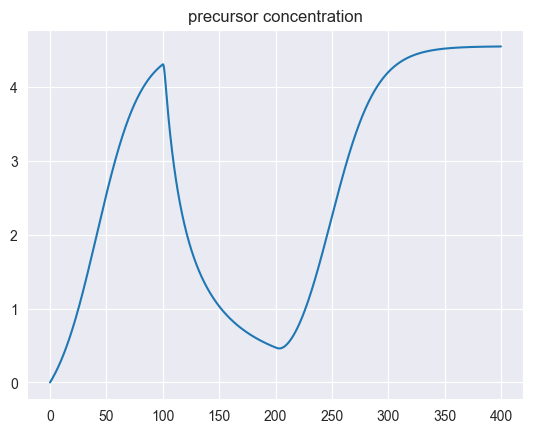

In [24]:
plt.plot(time_series.t, time_series.y[3])
plt.title("precursor concentration")
print(time_series.y[3][-1])
plt.show()

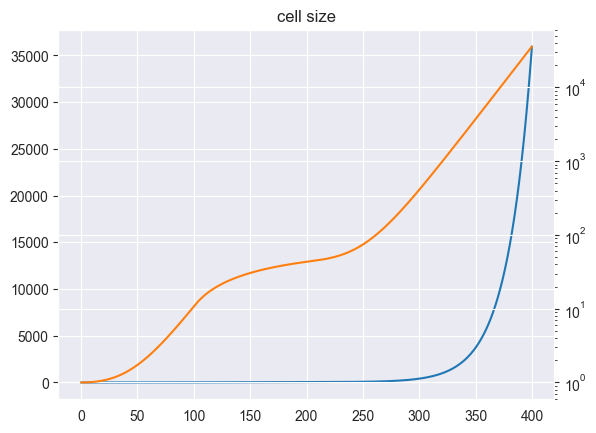

In [25]:
fig1, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series.t, time_series.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size")
plt.show()

## try see cell size in perfect adder

In [26]:
print(len(time_series.y[4]))
cell_size = copy.deepcopy(time_series.y[4])
timer = 0
sizer = 1
adder = 1
birth_size = cell_size[0]
for i in range(len(cell_size)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if recovery_time >= time_series.t[i] >= admin_time:
        birth_size = cell_size[i]
        continue
    
    if cell_size[i] - birth_size >= adder:
        cell_size[i:] = cell_size[i:]/2
        birth_size = cell_size[i]
    
    # if cell_size[i] >= sizer:
    #     print(f"division at {time_series.t[i]}, cell size {cell_size[i]}")
    #     cell_size[i:] = cell_size[i:]/2

4000


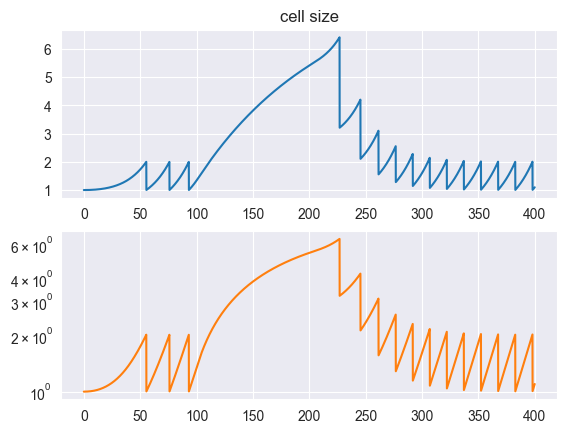

In [27]:
fig2, ax = plt.subplots(2)
ax[0].plot(time_series.t, cell_size)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series.t, cell_size, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

## perturb parameters

In [91]:
time_step = 0.1
admin_time = 100
recovery_time = 200
param = {"ribo_min": 0., 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 2, 
         "k_off": 0.1, 
         "alpha": 0.05, 
         "beta": 0.05, 
         "gama": 0.05, 
         "abx_env": 2, 
         "t_start": admin_time, 
         "t_end": recovery_time}
my_sim2 = Cell(**param)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 400
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|██████████| 1000/1000 [00:00<00:00, 15623.28‰/s]


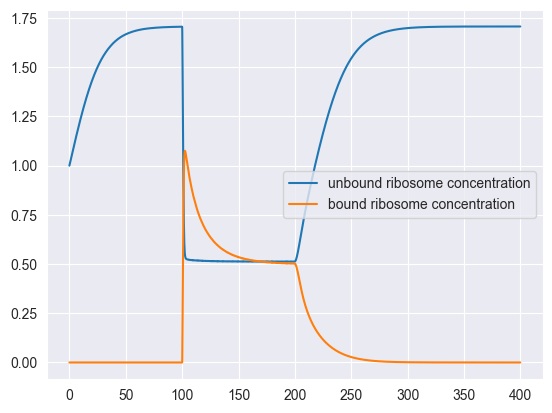

In [92]:
plt.plot(time_series2.t, time_series2.y[1], label="unbound ribosome concentration")
plt.plot(time_series2.t, time_series2.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

4000


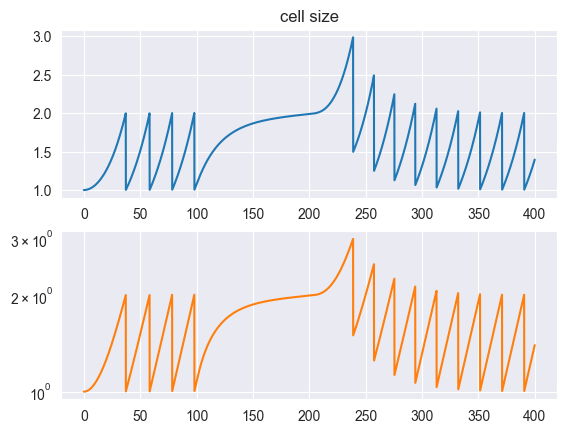

In [93]:
print(len(time_series2.y[4]))
cell_size = copy.deepcopy(time_series2.y[4])
timer = 0
sizer = 1
adder = 1
birth_size = cell_size[0]
for i in range(len(cell_size)):
    # if timer >= 10:
    #     cell_size[i:] = cell_size[i:]/2
    #     timer = 0
    # else:
    #     timer += 1
    if recovery_time >= time_series2.t[i] >= admin_time:
        birth_size = cell_size[i]
        continue
    
    if cell_size[i] - birth_size >= adder:
        cell_size[i:] = cell_size[i:]/2
        birth_size = cell_size[i]
        
fig3, ax = plt.subplots(2)
ax[0].plot(time_series2.t, cell_size)
ax[1].plot(time_series2.t, cell_size, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

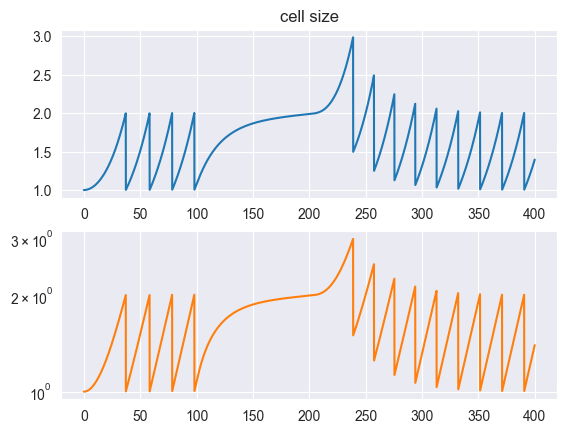

In [94]:
fig, ax = plt.subplots(2)
ax[0].plot(time_series.t, cell_size)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series.t, cell_size, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

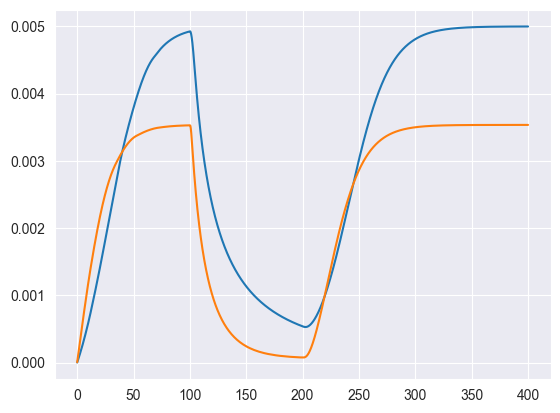

In [95]:
plt.plot(time_series.t, np.gradient(np.log(time_series.y[4])))
plt.plot(time_series2.t, np.gradient(np.log(time_series2.y[4])), color="C1")
# plt.yscale('log')
plt.show()